[Original Dataset link](https://www.kaggle.com/datasets/mssmartypants/rice-type-classification) - Rice type classification dataset: there are 2 classes: 1 - Jasmine, 0 - Gonen

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from typing import List, Any

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
og_dataset = pd.read_csv("riceClassification.csv")

In [3]:
og_dataset

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [4]:
og_dataset.isna().any()

id                 False
Area               False
MajorAxisLength    False
MinorAxisLength    False
Eccentricity       False
ConvexArea         False
EquivDiameter      False
Extent             False
Perimeter          False
Roundness          False
AspectRation       False
Class              False
dtype: bool

As we see, there are no missing values in dataset

In [5]:
og_dataset.dtypes

id                   int64
Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object

As we see, all of our features have numerical type

In [6]:
y = og_dataset['Class']
X = og_dataset.drop({"Class", "id"}, axis = 1)

In [7]:
y = y.squeeze()

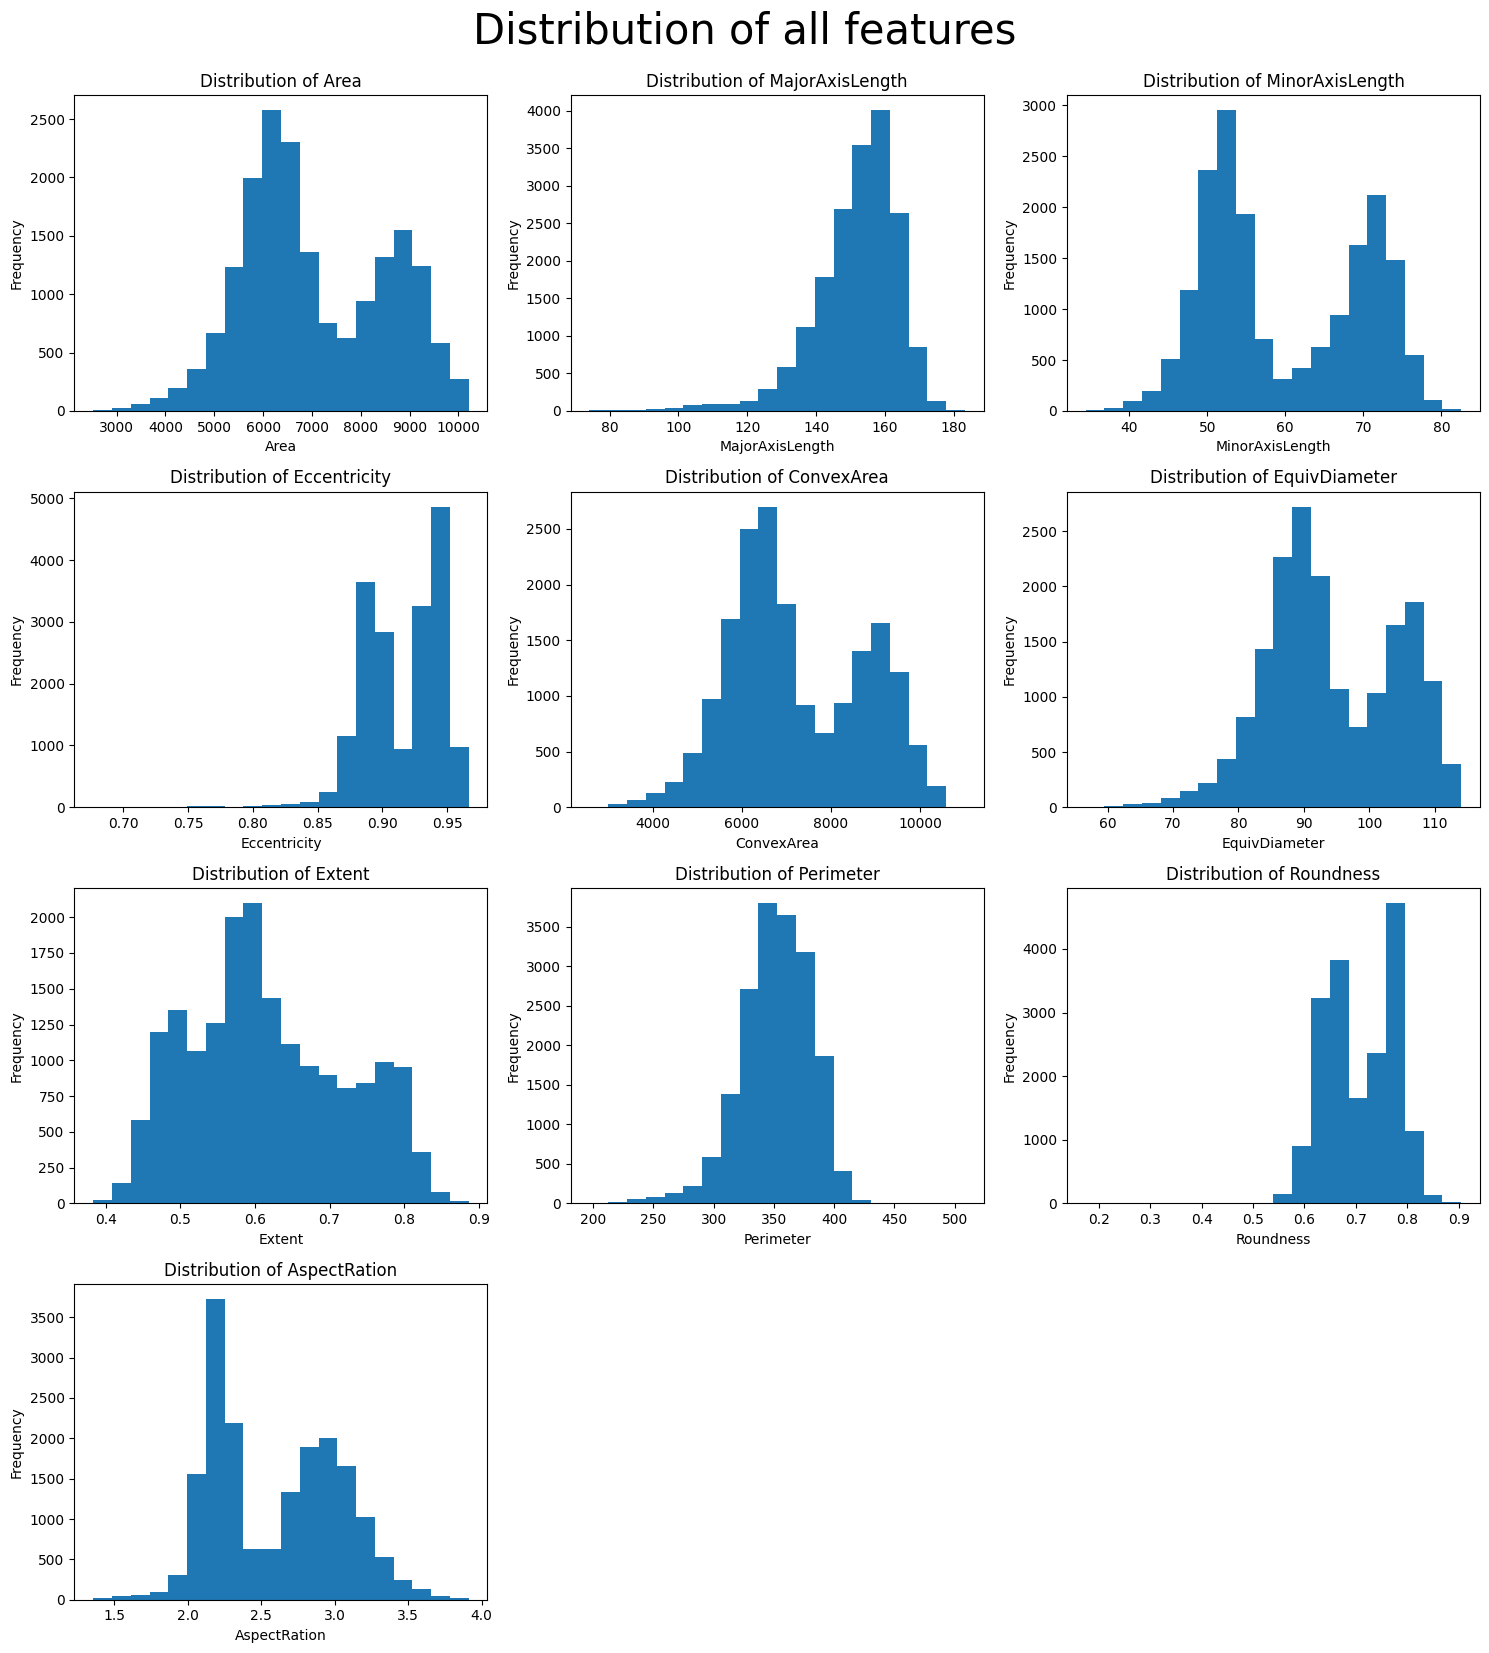

In [8]:
num_columns = len(X.columns)
cols = 3
rows = math.ceil(num_columns / cols)

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten to easily iterate over axes

for i, column in enumerate(X.columns):
    ax = axes[i]
    if X[column].dtype == 'object' or len(X[column].unique()) < 20:
        # For categorical or discrete features, use a bar plot
        X[column].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    else:
        # For continuous features, use a histogram
        X[column].plot(kind='hist', bins=20, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for readability
fig.suptitle("Distribution of all features", fontsize = 30, x=0.5, y=1.03)
plt.show()

In [9]:
y.value_counts(), y.value_counts() / len(y)

(Class
 1    9985
 0    8200
 Name: count, dtype: int64,
 Class
 1    0.549079
 0    0.450921
 Name: count, dtype: float64)

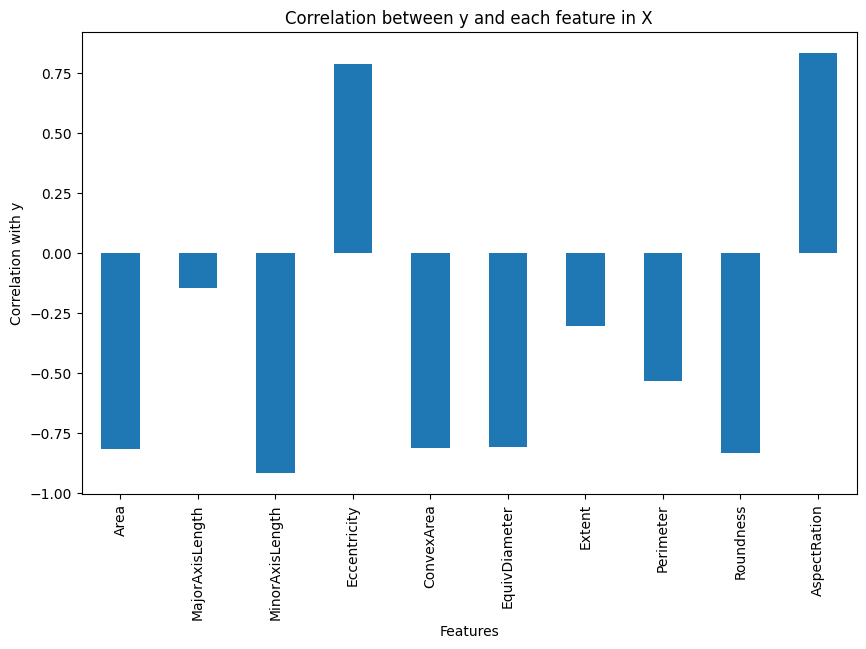

In [10]:
correlations = X.corrwith(y)
correlations.plot(kind='bar', figsize=(10, 6))
plt.title('Correlation between y and each feature in X')
plt.xlabel('Features')
plt.ylabel('Correlation with y')
plt.show()

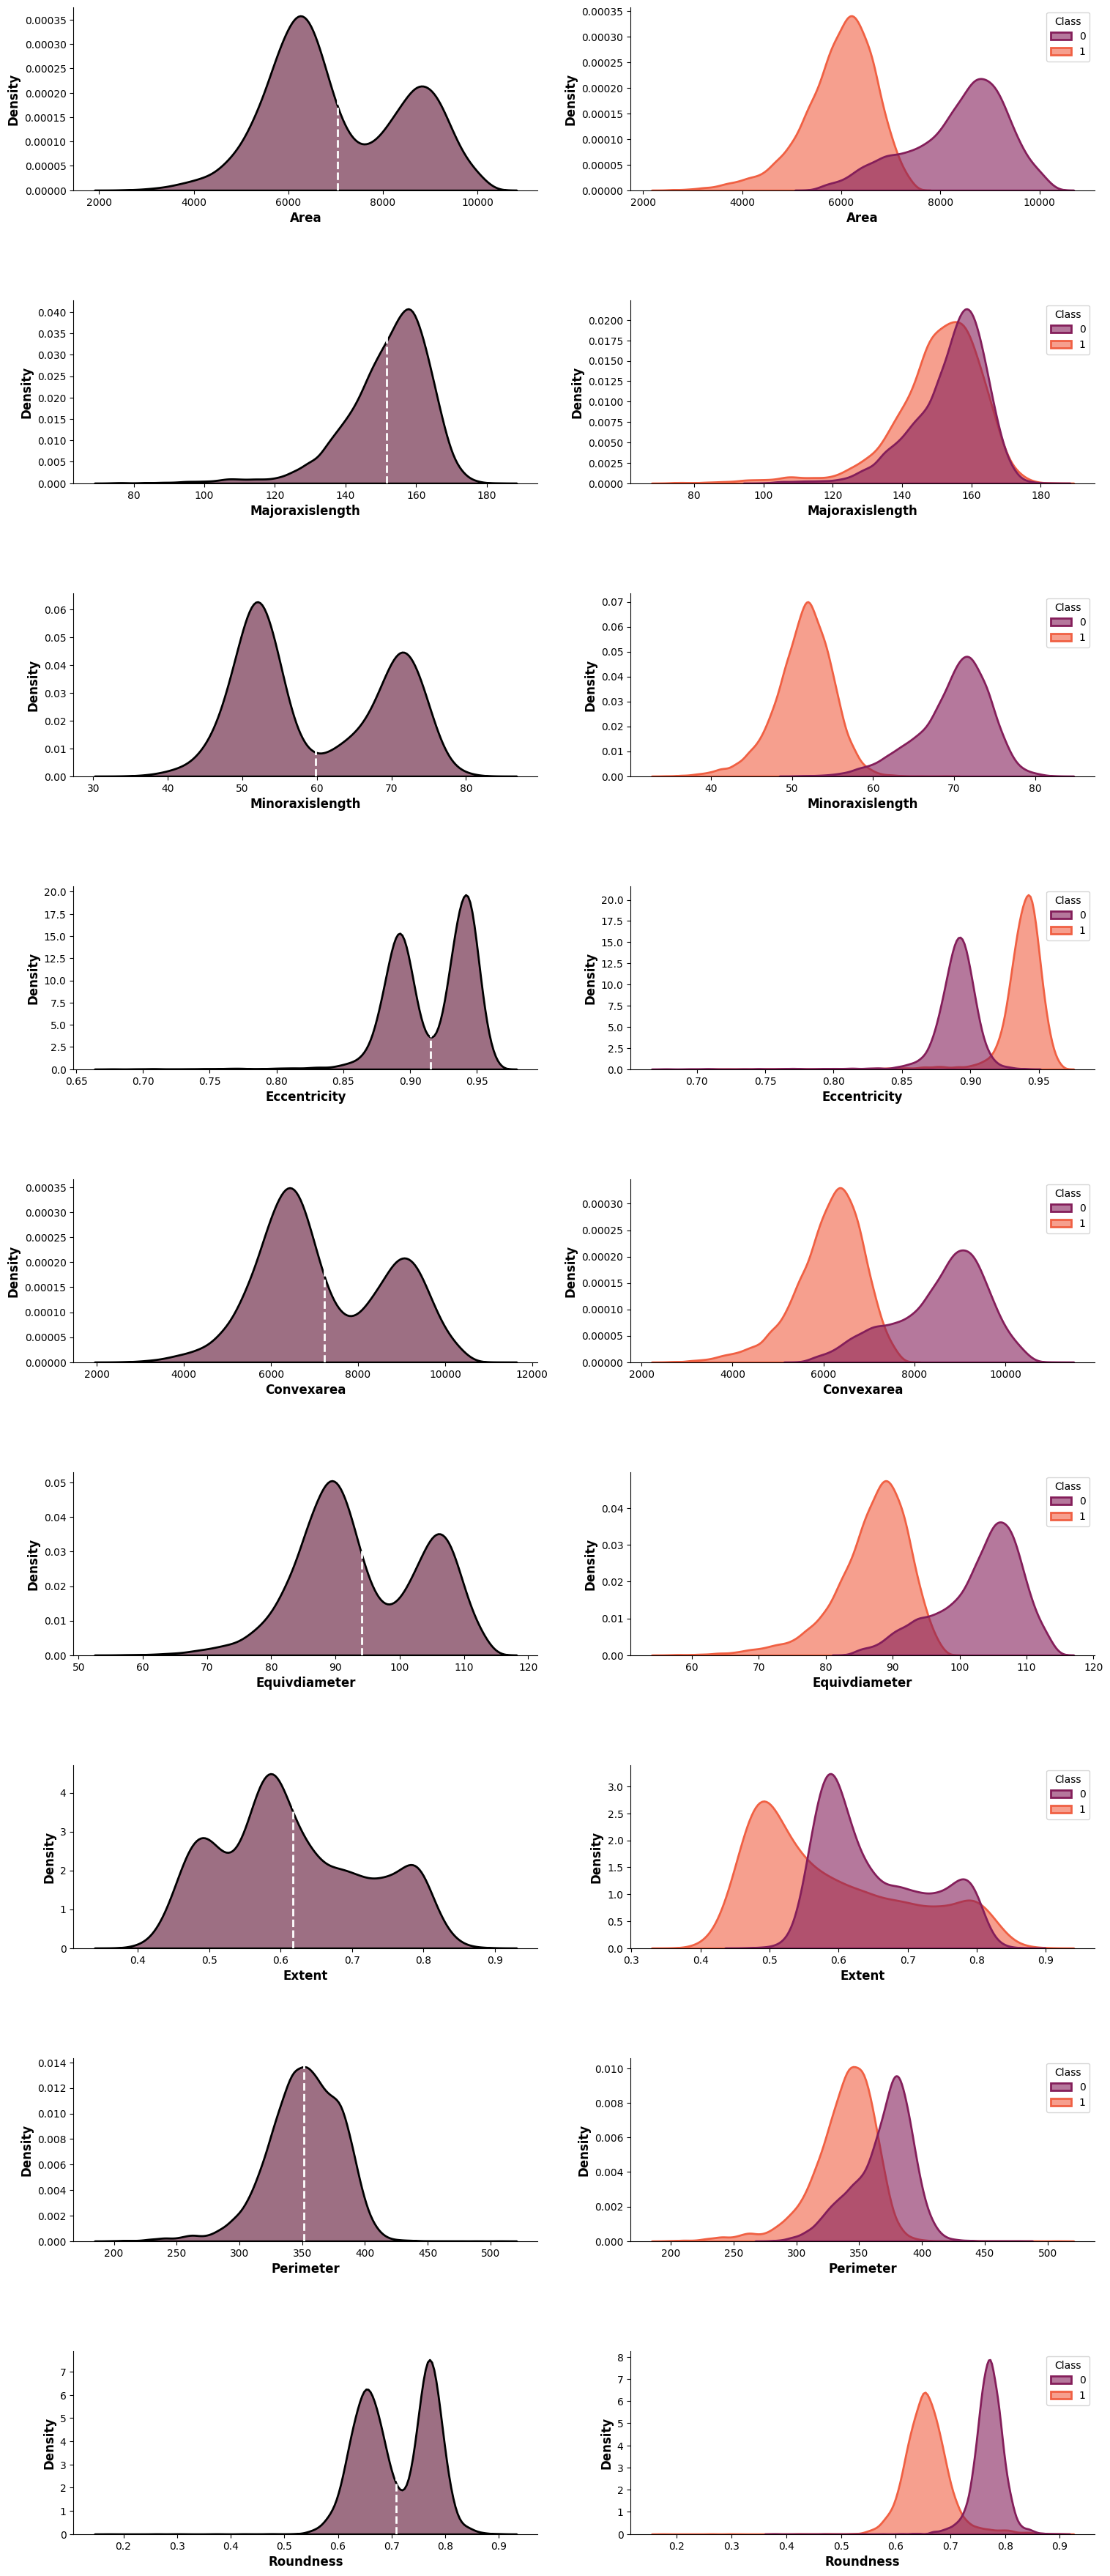

In [11]:
plotIndex = 1
plt.figure(figsize=(18,50))
for i in range(1, len(X.columns)):
    plt.subplot(len(X.columns), 2, plotIndex)
    sns.kdeplot(data=X, x=X.columns[i-1], 
                fill=True, linewidth=2, color='#5c1031', alpha=0.6, edgecolor='k')
    plt.axvline(X[X.columns[i-1]].mean(), color='white', linestyle='--', linewidth=2)
    plt.xlabel(xlabel=X.columns[i-1].title(), fontsize=12, weight='bold')
    plt.ylabel(ylabel='Density', fontsize=12, weight='bold')
    sns.despine()

    plt.subplot(len(X.columns), 2, plotIndex+1)
    sns.kdeplot(data=X, x=X.columns[i-1], 
                fill=True, hue=y, linewidth=2, palette='rocket', alpha=0.6)
    plt.xlabel(xlabel=X.columns[i-1].title(), fontsize=12, weight='bold')
    plt.ylabel(ylabel='Density', fontsize=12, weight='bold')
    sns.despine()

    
    plotIndex += 2
plt.subplots_adjust(hspace=0.6)    
plt.show()

As we see, there is some positive correlation between Eccentricity, AspectRation and Class; negative correlation between Area, MinotAxisLength, ConvexArea, EquivDiameter, Roundness and Class

# Data Scaling (binarization)

The link between the target and features is not clear so I decided to choose inter-ordinal scaling for every feature (every feature is numerical)

In [12]:
X_binarized = pd.DataFrame(index=X.index)

1. Area

In [13]:
min_area = X["Area"].min()
max_area = X["Area"].max()
min_area, max_area

(np.int64(2522), np.int64(10210))

2522 - 5000 - 7500 - 10210

In [14]:
thresholds = [min_area, 5000, 7500, max_area]
for threshold in thresholds:
    X_binarized[f'Area_le_{threshold}'] = X['Area'] <= threshold
    X_binarized[f'Area_ge_{threshold}'] = X['Area'] >= threshold

2. MajorAxisLength

In [15]:
min_majal = X["MajorAxisLength"].min()
max_majal = X["MajorAxisLength"].max()
min_majal, max_majal

(np.float64(74.13311404), np.float64(183.2114344))

74.13 - 100 - 125 - 150 - 175 - 183.21

In [16]:
thresholds = [min_majal, 100, 125, 150, 175, max_majal]
for threshold in thresholds:
    X_binarized[f'MajorAxisLength_le_{threshold}'] = X['MajorAxisLength'] <= threshold
    X_binarized[f'MajorAxisLength_ge_{threshold}'] = X['MajorAxisLength'] >= threshold

3. MinorAxisLength

In [17]:
min_minal = X["MinorAxisLength"].min()
max_minal = X["MinorAxisLength"].max()
min_minal, max_minal

(np.float64(34.40989421), np.float64(82.55076212))

34.41 - 45 - 60 - 75 - 82.55

In [18]:
thresholds = [min_minal, 45, 60, 75, max_minal]
for threshold in thresholds:
    X_binarized[f'MinorAxisLength_le_{threshold}'] = X['MinorAxisLength'] <= threshold
    X_binarized[f'MinorAxisLength_ge_{threshold}'] = X['MinorAxisLength'] >= threshold

4. Eccentricity

In [19]:
min_eccentricity = X["Eccentricity"].min()
max_eccentricity = X["Eccentricity"].max()
min_eccentricity, max_eccentricity

(np.float64(0.6766470565), np.float64(0.9667736672))

In [20]:
(
len(X[X['Eccentricity'] <= 0.89]),
len(X[X['Eccentricity'] <= 0.92]),
len(X[X['Eccentricity'] <= 0.937]),
len(X[X['Eccentricity'] <= 0.95])
)

(4041, 8849, 12066, 16716)

0.677 - 0.89 - 0.92 - 0.937 - 0.95 - 0.967

In [21]:
thresholds = [min_eccentricity, 0.89, 0.92, 0.937, 0.95, max_eccentricity]
for threshold in thresholds:
    X_binarized[f'Eccentricity_le_{threshold}'] = X['Eccentricity'] <= threshold
    X_binarized[f'Eccentricity_ge_{threshold}'] = X['Eccentricity'] >= threshold

5. ConvexArea

In [22]:
min_convarea = X["ConvexArea"].min()
max_convarea = X["ConvexArea"].max()
min_convarea, max_convarea

(np.int64(2579), np.int64(11008))

2579 - 5000 - 7500 - 10000 - 11008

In [23]:
thresholds = [min_convarea, 5000, 7500, 10000, max_convarea]
for threshold in thresholds:
    X_binarized[f'ConvexArea_le_{threshold}'] = X['ConvexArea'] <= threshold
    X_binarized[f'ConvexArea_ge_{threshold}'] = X['ConvexArea'] >= threshold

6. EquivDiameter

In [24]:
min_equivdiam = X["EquivDiameter"].min()
max_equivdiam = X["EquivDiameter"].max()
min_equivdiam, max_equivdiam

(np.float64(56.66665803), np.float64(114.0165591))

56.67 - 70 - 90 - 110 - 114.02

In [25]:
thresholds = [min_equivdiam, 70, 90, 110, max_equivdiam]
for threshold in thresholds:
    X_binarized[f'EquivDiameter_le_{threshold}'] = X['EquivDiameter'] <= threshold
    X_binarized[f'EquivDiameter_ge_{threshold}'] = X['EquivDiameter'] >= threshold

7. Extent

In [26]:
min_extent = X["Extent"].min()
max_extent = X["Extent"].max()
min_extent, max_extent

(np.float64(0.3832391714), np.float64(0.8865730584))

In [27]:
(
len(X[X['Extent'] <= 0.5]),
len(X[X['Extent'] <= 0.57]),
len(X[X['Extent'] <= 0.6]),
len(X[X['Extent'] <= 0.67]),
len(X[X['Extent'] <= 0.75]),
)

(2817, 6414, 8992, 12677, 15447)

0.38 - 0.5 - 0.57 - 0.6 - 0.67 - 0.75 - 0.89

In [28]:
thresholds = [min_extent, 0.5, 0.57, 0.6, 0.67, 0.75, max_extent]
for threshold in thresholds:
    X_binarized[f'Extent_le_{threshold}'] = X['Extent'] <= threshold
    X_binarized[f'Extent_ge_{threshold}'] = X['Extent'] >= threshold

8. Perimeter

In [29]:
min_perimeter = X["Perimeter"].min()
max_perimeter = X["Perimeter"].max()
min_perimeter, max_perimeter

(np.float64(197.015), np.float64(508.511))

197.015 - 300 - 375 - 450 - 508.511

In [30]:
thresholds = [min_perimeter, 300, 375, 450, max_perimeter]
for threshold in thresholds:
    X_binarized[f'Perimeter_le_{threshold}'] = X['Perimeter'] <= threshold
    X_binarized[f'Perimeter_ge_{threshold}'] = X['Perimeter'] >= threshold

9. Roundness

In [31]:
min_roundness = X["Roundness"].min()
max_roundness = X["Roundness"].max()
min_roundness, max_roundness

(np.float64(0.1745901779), np.float64(0.9047483132))

0.175 - 0.3 - 0.5 - 0.7 - 0.905

In [32]:
thresholds = [min_roundness, 0.3, 0.5, 0.7, max_roundness]
for threshold in thresholds:
    X_binarized[f'Roundness_le_{threshold}'] = X['Roundness'] <= threshold
    X_binarized[f'Roundness_ge_{threshold}'] = X['Roundness'] >= threshold

10. AsceptRation

In [33]:
min_aspration = X["AspectRation"].min()
max_aspration = X["AspectRation"].max()
min_aspration, max_aspration

(np.float64(1.358128195), np.float64(3.911844673))

1.36 - 2 - 2.8 - 3.6 - 3.91

In [34]:
thresholds = [min_aspration, 2, 2.8, 3.6, max_aspration]
for threshold in thresholds:
    X_binarized[f'AspectRation_le_{threshold}'] = X['AspectRation'] <= threshold
    X_binarized[f'AspectRation_ge_{threshold}'] = X['AspectRation'] >= threshold

C:\Users\Артём\AppData\Local\Temp\ipykernel_21468\2583488027.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_binarized[f'AspectRation_le_{threshold}'] = X['AspectRation'] <= threshold
C:\Users\Артём\AppData\Local\Temp\ipykernel_21468\2583488027.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_binarized[f'AspectRation_ge_{threshold}'] = X['AspectRation'] >= threshold
C:\Users\Артём\AppData\Local\Temp\ipykernel_21468\2583488027.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of call

 # Binarization is Complete

In [35]:
X_binarized.shape

(18185, 106)

18K rows with 106 columns will result in a very long time for making predictions using Lazy FCA classifier. On this step I decided to cut down some of data (due to perfomance issues) to fit classifier and make predictions

In [36]:
X_part, _, y_part, _ = train_test_split(X_binarized, y, test_size=0.94, stratify=y, random_state=42) # selecting only 6% 
                                                                                                     # of data for fitting and making predictions
X_train, X_test, y_train, y_test = train_test_split(X_part, y_part, test_size=0.2, stratify=y_part, random_state=42)

 # Lazy FCA baseline

In [37]:
class LazyClassifierFCA:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series) -> None:
        self.X_train = X_train
        self.y_train = y_train
        
    def classify_sample(self, sample: pd.Series) -> Any:
        # Split X_train into positive and negative classes
        X_train_positive = self.X_train[y_train == 1]
        X_train_negative = self.X_train[y_train == 0]
        
        positive_classifiers = 0
        negative_classifiers = 0
        
        # Function to check if intersection with a train sample is a positive classifier
        def is_positive_classifier(intersection):
            # Find samples in X_train_positive that contain the intersection
            num_positive = ((X_train_positive | ~intersection) == True).all(axis=1).sum()
            num_negative = ((X_train_negative | ~intersection) == True).all(axis=1).sum()
            return num_negative == 0 and num_positive > 1
        
        # Function to check if intersection is a negative classifier
        def is_negative_classifier(intersection):
            # Find samples in X_train_negative that contain the intersection
            num_positive = ((X_train_positive | ~intersection) == True).all(axis=1).sum()
            num_negative = ((X_train_negative | ~intersection) == True).all(axis=1).sum()
            return num_positive == 0 and num_negative > 1
        
        # Check for positive classifiers by intersecting sample with each positive object
        for _, pos_sample in X_train_positive.iterrows():
            intersection = sample & pos_sample
            if is_positive_classifier(intersection):
                positive_classifiers += 1

        # Check for negative classifiers by intersecting sample with each negative object
        for _, neg_sample in X_train_negative.iterrows():
            intersection = sample & neg_sample
            if is_negative_classifier(intersection):
                negative_classifiers += 1

        # Determine the class based on the number of classifiers
        if positive_classifiers > negative_classifiers:
            print(f"sample {sample.name} is classified as 1, {positive_classifiers=}, {negative_classifiers=}")
            return 1  # Predict positive
            
        elif negative_classifiers > positive_classifiers:
            print(f"sample {sample.name} is classified as 0, {positive_classifiers=}, {negative_classifiers=}")
            return 0  # Predict negative

        else:
            # If equal, you can decide on a rule, like defaulting to 0 or 1, or returning 'undetermined'
            print(f"sample {sample.name} is classified as 1, default, {positive_classifiers=}, {negative_classifiers=}")
        
            return 1  # or 0, depending on the choice


    def predict(self, X_test: pd.DataFrame) -> List[Any]:
        # List to store predictions for each test sample
        predictions = []
        
        # Iterate through each sample in X_test
        for _, sample in X_test.iterrows():
            # Classify the sample and append the result to predictions
            prediction = self.classify_sample(sample)
            predictions.append(prediction)
        
        return predictions 

In [38]:
classifier = LazyClassifierFCA()
classifier.fit(X_train, y_train)

In [39]:
y_pred = classifier.predict(X_test)

sample 11349 is classified as 0, positive_classifiers=0, negative_classifiers=360
sample 6313 is classified as 1, positive_classifiers=415, negative_classifiers=0
sample 8621 is classified as 1, positive_classifiers=404, negative_classifiers=0
sample 5828 is classified as 1, positive_classifiers=288, negative_classifiers=0
sample 5394 is classified as 1, positive_classifiers=404, negative_classifiers=0
sample 6119 is classified as 1, positive_classifiers=338, negative_classifiers=0
sample 1163 is classified as 1, positive_classifiers=270, negative_classifiers=0
sample 4656 is classified as 1, positive_classifiers=404, negative_classifiers=0
sample 6526 is classified as 0, positive_classifiers=0, negative_classifiers=367
sample 11363 is classified as 0, positive_classifiers=0, negative_classifiers=363
sample 6693 is classified as 1, positive_classifiers=289, negative_classifiers=0
sample 8078 is classified as 1, positive_classifiers=415, negative_classifiers=0
sample 6549 is classified 

In [40]:
f1_score(y_test, y_pred), accuracy_score(y_test, y_pred)

(np.float64(0.967741935483871), 0.9634703196347032)

In [41]:
def true_positive(y_test, y_pred):
    return np.count_nonzero((y_test == 1) & (y_pred == 1))

def true_negative(y_test, y_pred):
    return np.count_nonzero((y_test == 0) & (y_pred == 0))

def false_positive(y_test, y_pred):
    return np.count_nonzero((y_test == 0) & (y_pred == 1))

def false_negative(y_test, y_pred):
    return np.count_nonzero((y_test == 1) & (y_pred == 0))

def true_negative_rate(y_test, y_pred):
    return true_negative(y_pred, y_test) / (true_negative(y_pred, y_test) + false_positive(y_pred, y_test))

def negative_predictive_value(y_test, y_pred):
    return true_negative(y_pred, y_test) / (true_negative(y_pred, y_test) + false_negative(y_pred, y_test))

def false_positive_rate(y_test, y_pred):
    return false_positive(y_pred, y_test) / (false_positive(y_pred, y_test) + true_negative(y_pred, y_test))

def false_discovery_rate(y_test, y_pred):
    return false_positive(y_pred, y_test) / (false_positive(y_pred, y_test) + true_positive(y_pred, y_test))                           

In [42]:
y_all = pd.DataFrame(y_test)

In [43]:
y_all['pred'] = y_pred

In [44]:
y_test, y_pred = y_all['Class'], y_all['pred']

In [45]:
lazy_fca_metrics = pd.DataFrame({
    "model": "Lazy FCA",
    "True Positive": true_positive(y_test, y_pred),
    "True Negative": true_negative(y_test, y_pred),
    "False Positive": false_positive(y_test, y_pred),
    "False Negative": false_negative(y_test, y_pred),
    "True Negative Rate (Specificity)": true_negative_rate(y_test, y_pred),
    "Negative Predictive Value": negative_predictive_value(y_test, y_pred),
    "False Positive Rate": false_positive_rate(y_test, y_pred),
    "False Discovery Rate": false_discovery_rate(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall (True Positive Rate)": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)}, index=[0])

In [46]:
print(f"True Positive: {true_positive(y_test, y_pred)}")
print(f"True Negative: {true_negative(y_test, y_pred)}")
print(f"False Positive: {false_positive(y_test, y_pred)}")
print(f"False Negative: {false_negative(y_test, y_pred)}")
print(f"True Negative Rate (Specificity): {true_negative_rate(y_test, y_pred)}")
print(f"Negative Predictive Value: {negative_predictive_value(y_test, y_pred)}")
print(f"False Positive Rate: {false_positive_rate(y_test, y_pred)}")
print(f"False Discovery Rate: {false_discovery_rate(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall (True Positive Rate): {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

True Positive: 120
True Negative: 91
False Positive: 8
False Negative: 0
True Negative Rate (Specificity): 1.0
Negative Predictive Value: 0.9191919191919192
False Positive Rate: 0.0
False Discovery Rate: 0.0
Accuracy: 0.9634703196347032
Precision: 0.9375
Recall (True Positive Rate): 1.0
F1 Score: 0.967741935483871


As wee see, the performance of model is quite good, because all the metrics are > 0.9 (except FP, FN, FPR, FDR, but that's mainly because FP and FN = 0)

# Other model evaluation

## K Nearest Neighbor

In [96]:
knn_classifier = KNeighborsClassifier()

In [97]:
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

In [98]:
knn_metrics = pd.DataFrame({
    "model": "K Nearest Neighbor (kNN)",
    "True Positive": true_positive(y_test, y_pred),
    "True Negative": true_negative(y_test, y_pred),
    "False Positive": false_positive(y_test, y_pred),
    "False Negative": false_negative(y_test, y_pred),
    "True Negative Rate (Specificity)": true_negative_rate(y_test, y_pred),
    "Negative Predictive Value": negative_predictive_value(y_test, y_pred),
    "False Positive Rate": false_positive_rate(y_test, y_pred),
    "False Discovery Rate": false_discovery_rate(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall (True Positive Rate)": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)}, index=[1])

In [99]:
print(f"True Positive: {true_positive(y_test, y_pred)}")
print(f"True Negative: {true_negative(y_test, y_pred)}")
print(f"False Positive: {false_positive(y_test, y_pred)}")
print(f"False Negative: {false_negative(y_test, y_pred)}")
print(f"True Negative Rate (Specificity): {true_negative_rate(y_test, y_pred)}")
print(f"Negative Predictive Value: {negative_predictive_value(y_test, y_pred)}")
print(f"False Positive Rate: {false_positive_rate(y_test, y_pred)}")
print(f"False Discovery Rate: {false_discovery_rate(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall (True Positive Rate): {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

True Positive: 119
True Negative: 96
False Positive: 3
False Negative: 1
True Negative Rate (Specificity): 0.9896907216494846
Negative Predictive Value: 0.9696969696969697
False Positive Rate: 0.010309278350515464
False Discovery Rate: 0.008333333333333333
Accuracy: 0.9817351598173516
Precision: 0.9754098360655737
Recall (True Positive Rate): 0.9916666666666667
F1 Score: 0.9834710743801653


## Naive Bayes

In [100]:
nb_classifier = GaussianNB()

In [101]:
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

In [102]:
nb_metrics = pd.DataFrame({
    "model": "Naive Bayes",
    "True Positive": true_positive(y_test, y_pred),
    "True Negative": true_negative(y_test, y_pred),
    "False Positive": false_positive(y_test, y_pred),
    "False Negative": false_negative(y_test, y_pred),
    "True Negative Rate (Specificity)": true_negative_rate(y_test, y_pred),
    "Negative Predictive Value": negative_predictive_value(y_test, y_pred),
    "False Positive Rate": false_positive_rate(y_test, y_pred),
    "False Discovery Rate": false_discovery_rate(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall (True Positive Rate)": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)}, index=[2])

In [103]:
print(f"True Positive: {true_positive(y_test, y_pred)}")
print(f"True Negative: {true_negative(y_test, y_pred)}")
print(f"False Positive: {false_positive(y_test, y_pred)}")
print(f"False Negative: {false_negative(y_test, y_pred)}")
print(f"True Negative Rate (Specificity): {true_negative_rate(y_test, y_pred)}")
print(f"Negative Predictive Value: {negative_predictive_value(y_test, y_pred)}")
print(f"False Positive Rate: {false_positive_rate(y_test, y_pred)}")
print(f"False Discovery Rate: {false_discovery_rate(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall (True Positive Rate): {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

True Positive: 119
True Negative: 97
False Positive: 2
False Negative: 1
True Negative Rate (Specificity): 0.9897959183673469
Negative Predictive Value: 0.9797979797979798
False Positive Rate: 0.01020408163265306
False Discovery Rate: 0.008333333333333333
Accuracy: 0.9863013698630136
Precision: 0.9834710743801653
Recall (True Positive Rate): 0.9916666666666667
F1 Score: 0.9875518672199171


## Logistic Regression

In [104]:
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)

In [105]:
lr_metrics = pd.DataFrame({
    "model": "Logistic Regression",
    "True Positive": true_positive(y_test, y_pred),
    "True Negative": true_negative(y_test, y_pred),
    "False Positive": false_positive(y_test, y_pred),
    "False Negative": false_negative(y_test, y_pred),
    "True Negative Rate (Specificity)": true_negative_rate(y_test, y_pred),
    "Negative Predictive Value": negative_predictive_value(y_test, y_pred),
    "False Positive Rate": false_positive_rate(y_test, y_pred),
    "False Discovery Rate": false_discovery_rate(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall (True Positive Rate)": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)}, index=[3])

In [106]:
print(f"True Positive: {true_positive(y_test, y_pred)}")
print(f"True Negative: {true_negative(y_test, y_pred)}")
print(f"False Positive: {false_positive(y_test, y_pred)}")
print(f"False Negative: {false_negative(y_test, y_pred)}")
print(f"True Negative Rate (Specificity): {true_negative_rate(y_test, y_pred)}")
print(f"Negative Predictive Value: {negative_predictive_value(y_test, y_pred)}")
print(f"False Positive Rate: {false_positive_rate(y_test, y_pred)}")
print(f"False Discovery Rate: {false_discovery_rate(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall (True Positive Rate): {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

True Positive: 119
True Negative: 96
False Positive: 3
False Negative: 1
True Negative Rate (Specificity): 0.9896907216494846
Negative Predictive Value: 0.9696969696969697
False Positive Rate: 0.010309278350515464
False Discovery Rate: 0.008333333333333333
Accuracy: 0.9817351598173516
Precision: 0.9754098360655737
Recall (True Positive Rate): 0.9916666666666667
F1 Score: 0.9834710743801653


## SVM

In [107]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [108]:
svm_metrics = pd.DataFrame({
    "model": "SVM",
    "True Positive": true_positive(y_test, y_pred),
    "True Negative": true_negative(y_test, y_pred),
    "False Positive": false_positive(y_test, y_pred),
    "False Negative": false_negative(y_test, y_pred),
    "True Negative Rate (Specificity)": true_negative_rate(y_test, y_pred),
    "Negative Predictive Value": negative_predictive_value(y_test, y_pred),
    "False Positive Rate": false_positive_rate(y_test, y_pred),
    "False Discovery Rate": false_discovery_rate(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall (True Positive Rate)": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)}, index=[4])

In [109]:
print(f"True Positive: {true_positive(y_test, y_pred)}")
print(f"True Negative: {true_negative(y_test, y_pred)}")
print(f"False Positive: {false_positive(y_test, y_pred)}")
print(f"False Negative: {false_negative(y_test, y_pred)}")
print(f"True Negative Rate (Specificity): {true_negative_rate(y_test, y_pred)}")
print(f"Negative Predictive Value: {negative_predictive_value(y_test, y_pred)}")
print(f"False Positive Rate: {false_positive_rate(y_test, y_pred)}")
print(f"False Discovery Rate: {false_discovery_rate(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall (True Positive Rate): {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

True Positive: 120
True Negative: 96
False Positive: 3
False Negative: 0
True Negative Rate (Specificity): 1.0
Negative Predictive Value: 0.9696969696969697
False Positive Rate: 0.0
False Discovery Rate: 0.0
Accuracy: 0.9863013698630136
Precision: 0.975609756097561
Recall (True Positive Rate): 1.0
F1 Score: 0.9876543209876543


## Decision Tree

In [110]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

In [111]:
dt_metrics = pd.DataFrame({
    "model": "Decision Tree",
    "True Positive": true_positive(y_test, y_pred),
    "True Negative": true_negative(y_test, y_pred),
    "False Positive": false_positive(y_test, y_pred),
    "False Negative": false_negative(y_test, y_pred),
    "True Negative Rate (Specificity)": true_negative_rate(y_test, y_pred),
    "Negative Predictive Value": negative_predictive_value(y_test, y_pred),
    "False Positive Rate": false_positive_rate(y_test, y_pred),
    "False Discovery Rate": false_discovery_rate(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall (True Positive Rate)": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)}, index=[5])

In [112]:
print(f"True Positive: {true_positive(y_test, y_pred)}")
print(f"True Negative: {true_negative(y_test, y_pred)}")
print(f"False Positive: {false_positive(y_test, y_pred)}")
print(f"False Negative: {false_negative(y_test, y_pred)}")
print(f"True Negative Rate (Specificity): {true_negative_rate(y_test, y_pred)}")
print(f"Negative Predictive Value: {negative_predictive_value(y_test, y_pred)}")
print(f"False Positive Rate: {false_positive_rate(y_test, y_pred)}")
print(f"False Discovery Rate: {false_discovery_rate(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall (True Positive Rate): {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

True Positive: 119
True Negative: 96
False Positive: 3
False Negative: 1
True Negative Rate (Specificity): 0.9896907216494846
Negative Predictive Value: 0.9696969696969697
False Positive Rate: 0.010309278350515464
False Discovery Rate: 0.008333333333333333
Accuracy: 0.9817351598173516
Precision: 0.9754098360655737
Recall (True Positive Rate): 0.9916666666666667
F1 Score: 0.9834710743801653


## Random Forest

In [113]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)                                       

In [114]:
rf_metrics = pd.DataFrame({
    "model": "Random Forest",
    "True Positive": true_positive(y_test, y_pred),
    "True Negative": true_negative(y_test, y_pred),
    "False Positive": false_positive(y_test, y_pred),
    "False Negative": false_negative(y_test, y_pred),
    "True Negative Rate (Specificity)": true_negative_rate(y_test, y_pred),
    "Negative Predictive Value": negative_predictive_value(y_test, y_pred),
    "False Positive Rate": false_positive_rate(y_test, y_pred),
    "False Discovery Rate": false_discovery_rate(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall (True Positive Rate)": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)}, index=[6])

In [115]:
print(f"True Positive: {true_positive(y_test, y_pred)}")
print(f"True Negative: {true_negative(y_test, y_pred)}")
print(f"False Positive: {false_positive(y_test, y_pred)}")
print(f"False Negative: {false_negative(y_test, y_pred)}")
print(f"True Negative Rate (Specificity): {true_negative_rate(y_test, y_pred)}")
print(f"Negative Predictive Value: {negative_predictive_value(y_test, y_pred)}")
print(f"False Positive Rate: {false_positive_rate(y_test, y_pred)}")
print(f"False Discovery Rate: {false_discovery_rate(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall (True Positive Rate): {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

True Positive: 119
True Negative: 96
False Positive: 3
False Negative: 1
True Negative Rate (Specificity): 0.9896907216494846
Negative Predictive Value: 0.9696969696969697
False Positive Rate: 0.010309278350515464
False Discovery Rate: 0.008333333333333333
Accuracy: 0.9817351598173516
Precision: 0.9754098360655737
Recall (True Positive Rate): 0.9916666666666667
F1 Score: 0.9834710743801653


## XGBoost

In [116]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)         

In [117]:
xgb_metrics = pd.DataFrame({
    "model": "XGBoost",
    "True Positive": true_positive(y_test, y_pred),
    "True Negative": true_negative(y_test, y_pred),
    "False Positive": false_positive(y_test, y_pred),
    "False Negative": false_negative(y_test, y_pred),
    "True Negative Rate (Specificity)": true_negative_rate(y_test, y_pred),
    "Negative Predictive Value": negative_predictive_value(y_test, y_pred),
    "False Positive Rate": false_positive_rate(y_test, y_pred),
    "False Discovery Rate": false_discovery_rate(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall (True Positive Rate)": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)}, index=[7])

In [118]:
print(f"True Positive: {true_positive(y_test, y_pred)}")
print(f"True Negative: {true_negative(y_test, y_pred)}")
print(f"False Positive: {false_positive(y_test, y_pred)}")
print(f"False Negative: {false_negative(y_test, y_pred)}")
print(f"True Negative Rate (Specificity): {true_negative_rate(y_test, y_pred)}")
print(f"Negative Predictive Value: {negative_predictive_value(y_test, y_pred)}")
print(f"False Positive Rate: {false_positive_rate(y_test, y_pred)}")
print(f"False Discovery Rate: {false_discovery_rate(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall (True Positive Rate): {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

True Positive: 119
True Negative: 96
False Positive: 3
False Negative: 1
True Negative Rate (Specificity): 0.9896907216494846
Negative Predictive Value: 0.9696969696969697
False Positive Rate: 0.010309278350515464
False Discovery Rate: 0.008333333333333333
Accuracy: 0.9817351598173516
Precision: 0.9754098360655737
Recall (True Positive Rate): 0.9916666666666667
F1 Score: 0.9834710743801653


In [119]:
metrics_df = pd.DataFrame(lazy_fca_metrics, index=[0])

In [120]:
metrics_df = pd.concat([metrics_df, knn_metrics, nb_metrics, lr_metrics, svm_metrics, dt_metrics, rf_metrics, xgb_metrics], ignore_index=True)

In [121]:
metrics_df

,model,True Positive,True Negative,False Positive,False Negative,True Negative Rate (Specificity),Negative Predictive Value,False Positive Rate,False Discovery Rate,Accuracy,Precision,Recall (True Positive Rate),F1 Score
0,Lazy FCA,120,91,8,0,1.000000,0.919192,0.000000,0.000000,0.963470,0.937500,1.000000,0.967742
1,K Nearest Neighbor (kNN),119,96,3,1,0.989691,0.969697,0.010309,0.008333,0.981735,0.975410,0.991667,0.983471
2,Naive Bayes,119,97,2,1,0.989796,0.979798,0.010204,0.008333,0.986301,0.983471,0.991667,0.987552
3,Logistic Regression,119,96,3,1,0.989691,0.969697,0.010309,0.008333,0.981735,0.975410,0.991667,0.983471
4,SVM,120,96,3,0,1.000000,0.969697,0.000000,0.000000,0.986301,0.975610,1.000000,0.987654
5,Decision Tree,119,96,3,1,0.989691,0.969697,0.010309,0.008333,0.981735,0.975410,0.991667,0.983471
6,Random Forest,119,96,3,1,0.989691,0.969697,0.010309,0.008333,0.981735,0.975410,0.991667,0.983471
7,XGBoost,119,96,3,1,0.989691,0.969697,0.010309,0.008333,0.981735,0.975410,0.991667,0.983471


As we can see, Lazy FCA algorithm performed a little bit worse than other models (it has lower accuracy, NPV, Precision, f1_score) taking into account major metrics, but it had the best TNR, FPR, FDR and Recall.

Nevertheless, the difference in metrics is not that high and that means that Lazy FCA is good algorithm for binary classification.

However, the biggest minus of this algorithm is it’s complexity, because for each test row we are checking the dependencies with all train data and it has at least power-law complexity and that is why it is performing very slow with big amount of data.